<a href="https://colab.research.google.com/github/lalitpandey02/Bamboo-Weekly-by-Reuven-Lerner/blob/main/BW_16_Consumer_oil_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consumer oil prices**
How much do people pay for oil-based products in different countries? How do these prices vary over time?

Back in BW #10, we covered the changing price of a barrel of oil. But oil prices also affect consumers — they directly affect gasoline prices for car owners, indirectly affect people flying and taking public transit, and also influence manufacturing costs.

Moreover, oil prices can cause political issues: When prices are high, and cause gasoline prices to go up, people get rather upset. This is especially true in the United States, where the price of gasoline is somehow seen to be under the president's control, and affects his chances at re-election. (Americans also tend to forget that their gasoline, even at its most expensive, is far cheaper than drives pay in other countries.)

In oil-exporting countries, low oil prices can be a problem, depriving the government of income. (When oil is priced at less than $80/barrel, it is a problem for countries like Russia and Saudi Arabia.)

And let's not forget that in countries with cold climates, expensive heating oil can lead to real problems over the winter. There was a lot of fear that in the wake of Russia's invasion of Ukraine, oil prices would spike, making it unaffordable for many people.



## **Data and questions**

This week, we are looking at oil prices — not how much a barrel of oil costs, although that's generally what you’ll see in the news, but rather how much petroleum-based products costs to consumers. Given how much we’ve heard about heating oil in Europe over the last year, and how much people in the US are talking about gasoline prices as the summer starts, I thought it might be interesting to look at this.

The International Energy Agency (IEA)  is an intergovernmental organization that monitors and coordinates energy markets. They track this sort of information on energy prices among their member countries and makes the report publicly available. This weeks’ data came from https://www.iea.org/data-and-statistics/data-product/monthly-oil-price-statistics-2, where they offer monthly updates on the prices for three products: Gasoline, home heating oil, and diesel fuel.

We'll need to register for a free IEA account in order to download the data. Once we do that, we'll download the Excel (xslx) version of the monthly prices excerpt; the file that we retrieved was last updated on May 10th, 2023.

1. [Load the "raw_data" tab of the Excel file into Pandas as a data frame.](#q1)

2. Remove rows in which the VALUE column is ".."

3. Turn the VALUE column into a float.

4. When reading data from a CSV file, we need to tell Pandas to interpret a column as a `datetype` dtype. Why didn't we have to do that here?

5. Each piece of data is repeated, once in US dollars and once in their national currency. So that we can compare prices, keep only the US dollars

In [13]:
import pandas as pd
import numpy as np

## 1. Load the "raw_data" tab of the Excel file<a id="q1"></a>


In [103]:
filename = '/content/data/IEA_Energy_Prices_Monthly_Excerpt_052023.xlsx'
# This excel sheet is saved in the path https://github.com/lalitpandey02/Bamboo-Weekly-by-Reuven-Lerner/blob/main/data/IEA_Energy_Prices_Monthly_Excerpt_052023.xlsx

df = pd.read_excel(filename,sheet_name='raw_data')
df.head()

,COUNTRY,PRODUCT,FLOW,UNIT,TIME,VALUE
0,Austria,Gasoline (unit/litre),Total Price,National currency,2015-01-01,1.13
1,Austria,Gasoline (unit/litre),Total Price,National currency,2015-02-01,1.16
2,Austria,Gasoline (unit/litre),Total Price,National currency,2015-03-01,1.21
3,Austria,Gasoline (unit/litre),Total Price,National currency,2015-04-01,1.24
4,Austria,Gasoline (unit/litre),Total Price,National currency,2015-05-01,1.27


In [104]:
print (df.shape)
df.info()

(19800, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   COUNTRY  19800 non-null  object        
 1   PRODUCT  19800 non-null  object        
 2   FLOW     19800 non-null  object        
 3   UNIT     19800 non-null  object        
 4   TIME     19800 non-null  datetime64[ns]
 5   VALUE    19800 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 928.2+ KB


## 2. Remove rows in which the VALUE column is ".."

In [105]:
df = df[df["VALUE"]!=".."]
df

# Alternate way to do this is 
# df = pd.read_excel(filename, sheet_name='raw_data', na_values=['..'])

,COUNTRY,PRODUCT,FLOW,UNIT,TIME,VALUE
0,Austria,Gasoline (unit/litre),Total Price,National currency,2015-01-01,1.13
1,Austria,Gasoline (unit/litre),Total Price,National currency,2015-02-01,1.16
2,Austria,Gasoline (unit/litre),Total Price,National currency,2015-03-01,1.21
3,Austria,Gasoline (unit/litre),Total Price,National currency,2015-04-01,1.24
4,Austria,Gasoline (unit/litre),Total Price,National currency,2015-05-01,1.27
...,...,...,...,...,...,...
19791,Brazil,Diesel (unit/litre),Total price,US dollars,2023-04-01,1.15
19794,India,Gasoline (unit/litre),Total price,National currency,2023-04-01,103.97
19795,India,Gasoline (unit/litre),Total price,US dollars,2023-04-01,1.27
19796,India,Diesel (unit/litre),Total price,National currency,2023-04-01,93.8


## 3. Turn the VALUE column into a float

In [106]:
df['VALUE'] = df['VALUE'].astype(np.float64)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19296 entries, 0 to 19797
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   COUNTRY  19296 non-null  object        
 1   PRODUCT  19296 non-null  object        
 2   FLOW     19296 non-null  object        
 3   UNIT     19296 non-null  object        
 4   TIME     19296 non-null  datetime64[ns]
 5   VALUE    19296 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.0+ MB


## 4. When reading data from a CSV file, we need to tell Pandas to interpret a column as a `datetype` dtype. Why didn't we have to do that here?

In [108]:
# CSV is a text format, which means that if we don’t specify the dtypes of the columns we read, 
# Pandas has to guess. In the case of Excel, Pandas doesn’t have to guess; 
# the file format itself specifies, rather clearly, what type of data each column contains. 
# Which means that we don’t need to tell Pandas to treat one or more columns as datetime values; 
# it gets that from the Excel file.

## 5. Each piece of data is repeated, once in US dollars and once in their national currency. So that we can compare prices, keep only the US dollars.

In [109]:
df["UNIT"].unique()

array(['National currency', 'US dollars'], dtype=object)

In [110]:
df = df[df["UNIT"]=="US dollars"]
df

,COUNTRY,PRODUCT,FLOW,UNIT,TIME,VALUE
84,Austria,Gasoline (unit/litre),Total Price,US dollars,2015-01-01,1.31
85,Austria,Gasoline (unit/litre),Total Price,US dollars,2015-02-01,1.31
86,Austria,Gasoline (unit/litre),Total Price,US dollars,2015-03-01,1.31
87,Austria,Gasoline (unit/litre),Total Price,US dollars,2015-04-01,1.35
88,Austria,Gasoline (unit/litre),Total Price,US dollars,2015-05-01,1.41
...,...,...,...,...,...,...
19785,United States,Diesel (unit/litre),Total price,US dollars,2023-04-01,1.08
19789,Brazil,Gasoline (unit/litre),Total price,US dollars,2023-04-01,1.10
19791,Brazil,Diesel (unit/litre),Total price,US dollars,2023-04-01,1.15
19795,India,Gasoline (unit/litre),Total price,US dollars,2023-04-01,1.27


## 6. Oil Price change in India over the years

In [111]:
df_ind = df[df["COUNTRY"]=="India"]
df_ind

,COUNTRY,PRODUCT,FLOW,UNIT,TIME,VALUE
16212,India,Gasoline (unit/litre),Total Price,US dollars,2015-01-01,1.05
16213,India,Gasoline (unit/litre),Total Price,US dollars,2015-02-01,1.00
16214,India,Gasoline (unit/litre),Total Price,US dollars,2015-03-01,1.05
16215,India,Gasoline (unit/litre),Total Price,US dollars,2015-04-01,1.03
16216,India,Gasoline (unit/litre),Total Price,US dollars,2015-05-01,1.10
...,...,...,...,...,...,...
19597,India,Gasoline (unit/litre),Total price,US dollars,2023-03-01,1.26
19599,India,Diesel (unit/litre),Total price,US dollars,2023-03-01,1.14
19601,India,Domestic heating oil (unit/litre),Total price,US dollars,2023-03-01,0.87
19795,India,Gasoline (unit/litre),Total price,US dollars,2023-04-01,1.27


In [112]:
df_ind["PRODUCT"].unique()

array(['Gasoline (unit/litre)', 'Diesel (unit/litre)',
       'Domestic heating oil (unit/litre)'], dtype=object)

In [113]:
import matplotlib.pyplot as plt

In [114]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 16212 to 19797
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   COUNTRY  289 non-null    object        
 1   PRODUCT  289 non-null    object        
 2   FLOW     289 non-null    object        
 3   UNIT     289 non-null    object        
 4   TIME     289 non-null    datetime64[ns]
 5   VALUE    289 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 15.8+ KB


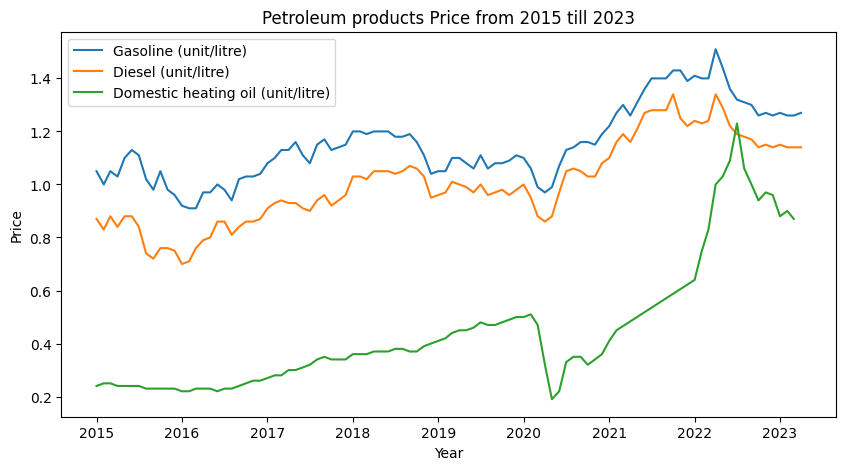

In [115]:
fig = plt.figure(figsize=(10,5))
plt.plot( df_ind[df_ind["PRODUCT"]=="Gasoline (unit/litre)"]["TIME"], \
         df_ind[df_ind["PRODUCT"]=="Gasoline (unit/litre)"]["VALUE"], \
         label = "Gasoline (unit/litre)")
plt.plot( df_ind[df_ind["PRODUCT"]=="Diesel (unit/litre)"]["TIME"], \
         df_ind[df_ind["PRODUCT"]=="Diesel (unit/litre)"]["VALUE"], \
         label = "Diesel (unit/litre)")
plt.plot( df_ind[df_ind["PRODUCT"]=="Domestic heating oil (unit/litre)"]["TIME"], \
         df_ind[df_ind["PRODUCT"]=="Domestic heating oil (unit/litre)"]["VALUE"], \
         label = "Domestic heating oil (unit/litre)")

plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Petroleum products Price from 2015 till 2023")
plt.legend()
plt.show()

## 7. Top 5 countries with max avg and min avg Gasoline price in 2023

In [116]:
df_mean = df[(df["TIME"] == '2023') & (df["PRODUCT"]=="Gasoline (unit/litre)")][["COUNTRY","VALUE"]]\
  .groupby(by="COUNTRY" ).mean().reset_index().sort_values("VALUE", ascending=True)
df_mean

,COUNTRY,VALUE
32,United States,0.88
2,Brazil,0.97
4,Canada,1.14
15,India,1.27
18,Japan,1.29
28,Slovenia,1.39
3,Bulgaria,1.39
26,Romania,1.41
22,Malta,1.44
6,Cyprus,1.48


In [117]:
df_top_bottom5 = pd.concat([df_mean.head(),df_mean.tail()]).sort_values("VALUE", ascending=True)
df_top_bottom5

,COUNTRY,VALUE
32,United States,0.88
2,Brazil,0.97
4,Canada,1.14
15,India,1.27
18,Japan,1.29
17,Italy,1.97
11,France,1.99
13,Greece,2.02
10,Finland,2.06
8,Denmark,2.13


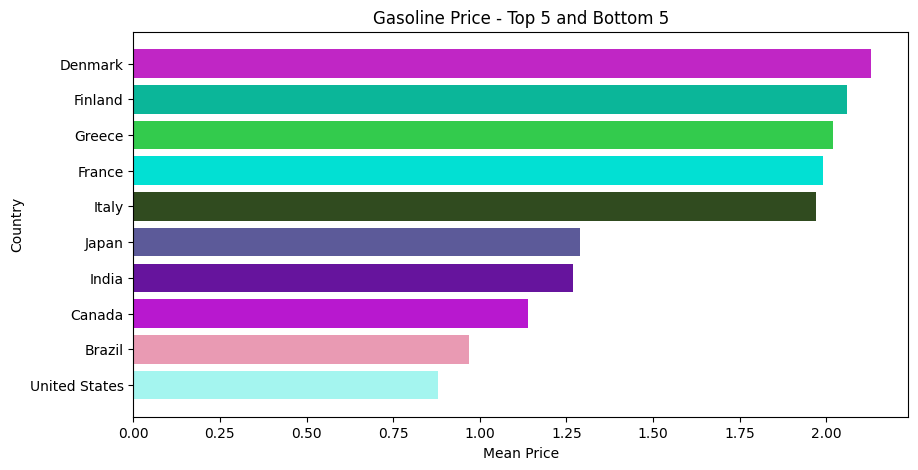

In [118]:
figure = plt.figure(figsize=(10,5))
plt.barh(df_top_bottom5.COUNTRY, df_top_bottom5.VALUE, color = np.random.rand(10,3))
plt.xlabel("Mean Price")
plt.ylabel("Country")
plt.title("Gasoline Price - Top 5 and Bottom 5")
plt.show()